<a href="https://colab.research.google.com/github/laresamdeola/Research/blob/main/COMESA_Sent_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
import seaborn as sns
import gensim
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# spacy english model for NER

nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [ ]:
corpus_data = pd.read_csv('COMESA TREATY.txt', delimiter="\t")
# corpus_comments = corpus_data['comments']
len(corpus_data)

3901

In [ ]:
corpus_data[0:10]

,PREAMBLE
0,The President of the Republic of Angola;
1,The President of the Republic of Burundi;
2,The President of the Federal Islamic Republic ...
3,The President of the Democratic Republic of Co...
4,The President of the Republic of Djibouti;
5,The President of the State of Eritrea;
6,The President of the Transitional Government o...
7,The President of the Republic of Kenya;
8,His Majesty the King of the Kingdom of Lesotho;
9,The President of the Republic of Madagascar;


In [ ]:
comesa_trade_policies = corpus_data['PREAMBLE']

In [ ]:
len(comesa_trade_policies)

3901

In [ ]:
comesa_trade_policies

,PREAMBLE
0,The President of the Republic of Angola;
1,The President of the Republic of Burundi;
2,The President of the Federal Islamic Republic ...
3,The President of the Democratic Republic of Co...
4,The President of the Republic of Djibouti;
...,...
3896,Provided that the provisions of such legislati...
3897,"Protocol, are extended to other Member States ..."
3898,that are more favourable than those enjoyed by...
3899,9. All Common Market Transit Documents may hav...


In [ ]:
type(comesa_trade_policies)

pandas.core.series.Series

In [ ]:
len(comesa_trade_policies)

3901

In [ ]:
comesa_trade_policies = list(comesa_trade_policies)

In [ ]:
# corpus_comments

In [ ]:
# corpus_words = [re.sub(r'[^\w\s]', '', word) for word in corpus_comments]

In [ ]:
comesa_trade_policies = nltk.tokenize.word_tokenize(str(comesa_trade_policies))

In [ ]:
len(comesa_trade_policies)

50225

In [ ]:
# corpus_tokens

In [ ]:
comesa_trade_policies_clean = [word for word in comesa_trade_policies if word.isalpha()]

In [ ]:
# corpus_tokens_clean[100:]

In [ ]:
len(comesa_trade_policies_clean)

33016

In [ ]:
comesa_trade_policies_preprocessed = [word for word in comesa_trade_policies_clean if word not in set(stopwords.words('english'))]

In [ ]:
len(comesa_trade_policies_preprocessed)

18535

In [ ]:
freq_dist = nltk.FreqDist(comesa_trade_policies_preprocessed)

In [ ]:
freq_dist

FreqDist({'Member': 587, 'shall': 489, 'States': 418, 'Market': 348, 'Common': 339, 'The': 233, 'State': 212, 'Treaty': 156, 'goods': 155, 'may': 131, ...})

In [ ]:
len(freq_dist)

3319

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

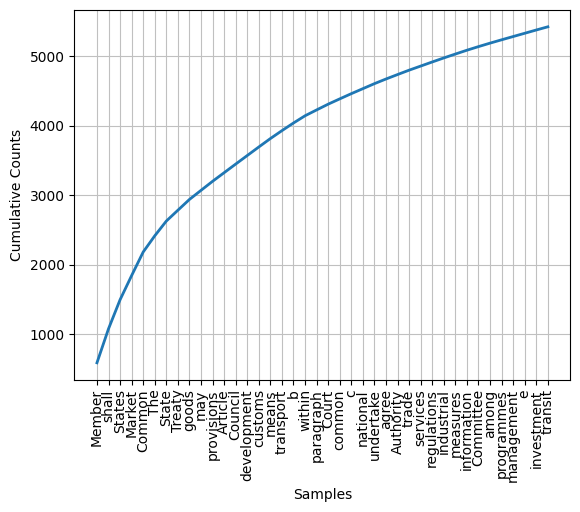

In [ ]:
freq_dist.plot(40, cumulative=True)

In [ ]:
print('\n')
freq_dist.tabulate(10)
print(f'\n Amount of Words: {len(comesa_trade_policies_clean)}')
print(f'\n Lexical Diversity: {len(comesa_trade_policies_clean)/len(set(str(comesa_trade_policies_clean)))}')
print(f'\n Vocabulary: {list(freq_dist.keys())}')
print(f'\n Vocabulary Size: {len(list(freq_dist.keys()))}')



Member  shall States Market Common    The  State Treaty  goods    may 
   587    489    418    348    339    233    212    156    155    131 

 Amount of Words: 33016

 Lexical Diversity: 579.2280701754386

 Vocabulary: ['President', 'Republic', 'Angola', 'Burundi', 'Federal', 'Islamic', 'Comoros', 'Democratic', 'Congo', 'Djibouti', 'State', 'Eritrea', 'Transitional', 'Government', 'Ethiopia', 'Kenya', 'Majesty', 'King', 'Kingdom', 'Lesotho', 'Madagascar', 'Life', 'Malawi', 'Prime', 'Minister', 'Mauritius', 'Mozambique', 'Namibia', 'Rwanda', 'Seychelles', 'Somali', 'Sudan', 'Swaziland', 'United', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe', 'overriding', 'need', 'establish', 'Common', 'Market', 'Eastern', 'Southern', 'Africa', 'IN', 'MIND', 'establishment', 'among', 'respective', 'States', 'Preferential', 'Trade', 'Area', 'African', 'first', 'step', 'towards', 'creation', 'Economic', 'Community', 'provisions', 'Article', 'Treaty', 'Establishment', 'effect', 'steps', 'taken', 'develop'

In [ ]:
table = freq_dist.tabulate(10)

Member  shall States Market Common    The  State Treaty  goods    may 
   587    489    418    348    339    233    212    156    155    131 


In [ ]:
freq_dist

FreqDist({'Member': 587, 'shall': 489, 'States': 418, 'Market': 348, 'Common': 339, 'The': 233, 'State': 212, 'Treaty': 156, 'goods': 155, 'may': 131, ...})

In [ ]:
import pandas as pd

words = ['Member', 'shall', 'States', 'Market', 'Common', 'The', 'State', 'Treaty', 'goods', 'may']
word_frequency = [587, 489, 418, 348, 339, 233, 212, 156, 155, 131]

data = {'Word': words, 'Frequency': word_frequency}
df = pd.DataFrame(data)

df_sorted = df.sort_values(by='Frequency')

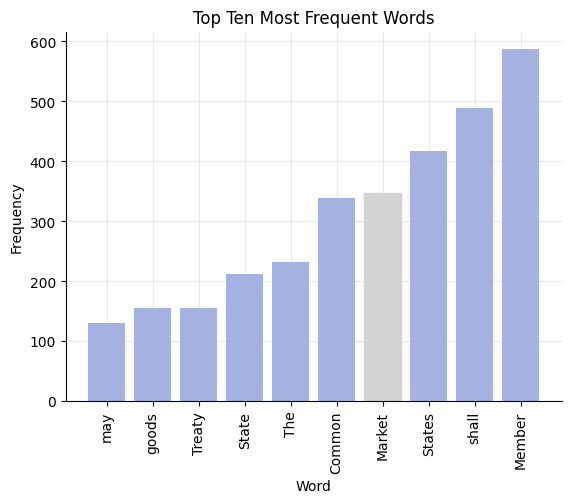

In [ ]:
import matplotlib.pyplot as plt

bars = plt.bar(df_sorted['Word'], df_sorted['Frequency'], color='#a4b2e2', zorder=2)
bars[6].set_color('lightgray')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top Ten Most Frequent Words')
plt.xticks(rotation=90)
plt.grid(color="#272727", alpha=0.1, zorder=1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.show()

In [ ]:
words_from_freq_dist = [word for word in freq_dist.keys()]
values_from_freq_dist = [word for word in freq_dist.values()]

data_freq = {'Word': words_from_freq_dist, 'Frequency': values_from_freq_dist}
df_freq = pd.DataFrame(data_freq)

df_sorted_freq = df_freq.sort_values(by='Frequency', ascending=False)

In [ ]:
df_sorted_freq

,Word,Frequency
140,Member,587
137,shall,489
51,States,418
42,Market,348
41,Common,339
...,...,...
3299,placed,1
3300,clearly,1
3301,visible,1
3302,removable,1


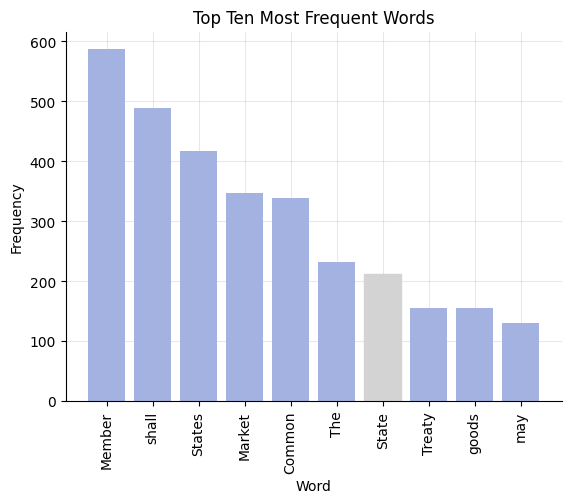

In [ ]:
import matplotlib.pyplot as plt

bars = plt.bar(df_sorted_freq['Word'][0:10], df_sorted_freq['Frequency'][0:10], color='#a4b2e2', zorder=2)
bars[6].set_color('lightgray')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top Ten Most Frequent Words')
plt.xticks(rotation=90)
plt.grid(color="#272727", alpha=0.1, zorder=1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.show()

In [ ]:
def text_analysis(corpus):
  corpus_data = pd.read_csv(corpus, delimiter="\t")
  corpus_comments = corpus_data['PREAMBLE']
  # corpus_comments_strings = str(corpus_comments)
  corpus_comments = list(corpus_comments)
  tokens = nltk.tokenize.word_tokenize(str(corpus_comments))
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word for word in tokens if word not in set(stopwords.words('english'))]
  freq_dist = nltk.FreqDist(tokens)
  freq_dist.plot(40, cumulative=True)
  corpus_text = nltk.Text(str(corpus_comments))
  print('\n')
  freq_dist.tabulate(10)
  print(f'\n Amount of Words: {len(tokens)}')
  print(f'\n Lexical Diversity: {len(tokens)/len(set(str(tokens)))}')
  print(f'\n Vocabulary: {list(freq_dist.keys())}')
  print(f'\n Vocabulary Size: {len(list(freq_dist.keys()))}')
  print('\n')
  print('\n')
  print('\n')
  #print(corpus_comments_clean[:-2])
  wordcloud = WordCloud(width = 1400,
                      height = 800,
                      stopwords = stop_words,
                      min_font_size = 12,
                      random_state=1,
                      collocations=True,
                      colormap='coolwarm').generate(' '.join(comesa_trade_policies))
  plt.figure(figsize = (10, 6), facecolor = None)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.savefig(f'wordcloud {corpus}.png', format='png', dpi=150, bbox_inches='tight')
  plt.axis('off')
  plt.show()



Member  shall States Market Common    The  State Treaty  goods    may 
   587    489    418    348    339    233    212    156    155    131 

 Amount of Words: 18535

 Lexical Diversity: 325.17543859649123

 Vocabulary: ['President', 'Republic', 'Angola', 'Burundi', 'Federal', 'Islamic', 'Comoros', 'Democratic', 'Congo', 'Djibouti', 'State', 'Eritrea', 'Transitional', 'Government', 'Ethiopia', 'Kenya', 'Majesty', 'King', 'Kingdom', 'Lesotho', 'Madagascar', 'Life', 'Malawi', 'Prime', 'Minister', 'Mauritius', 'Mozambique', 'Namibia', 'Rwanda', 'Seychelles', 'Somali', 'Sudan', 'Swaziland', 'United', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe', 'overriding', 'need', 'establish', 'Common', 'Market', 'Eastern', 'Southern', 'Africa', 'IN', 'MIND', 'establishment', 'among', 'respective', 'States', 'Preferential', 'Trade', 'Area', 'African', 'first', 'step', 'towards', 'creation', 'Economic', 'Community', 'provisions', 'Article', 'Treaty', 'Establishment', 'effect', 'steps', 'taken', 'develop

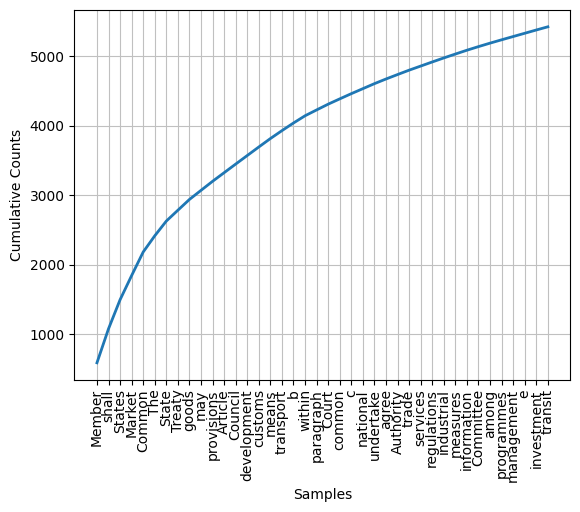

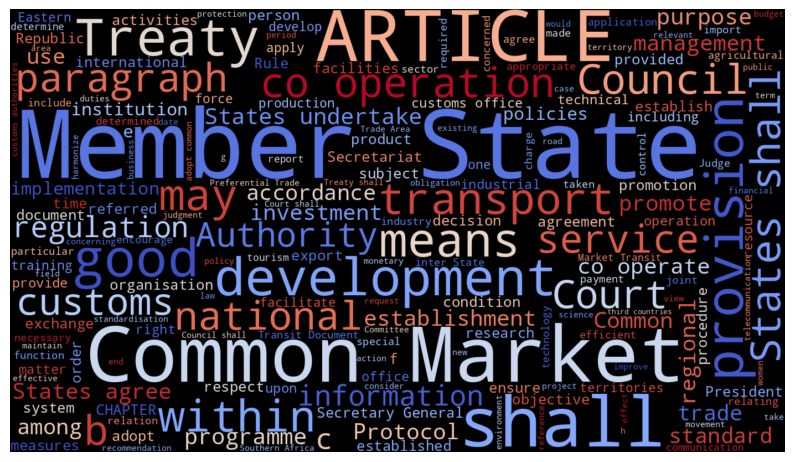

In [ ]:
text_analysis('COMESA TREATY.txt')

Collocations (Bigrams)

In [ ]:
bigram_measures = BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_words(comesa_trade_policies_preprocessed)
top_bigrams = bigram_finder.nbest(bigram_measures.likelihood_ratio, 20)

print('Top Bigrams:')
for bigram, freq in top_bigrams:
  print("".join(bigram) + " : " + str(freq))

Top Bigrams:
Member : States
Common : Market
Member : State
paragraph : Article
States : undertake
The : Member
States : agree
within : Common
Eastern : Southern
For : purposes
provisions : Treaty
States : shall
To : end
Trade : Area
Economic : Community
Transit : Document
means : transport
Preferential : Trade
Southern : Africa
third : countries


Trigrams - Most Occurring three words

In [ ]:
trigrams = ngrams(comesa_trade_policies_preprocessed, 3)

trigram_freq_dist = nltk.FreqDist(trigrams)
most_common_trigrams = trigram_freq_dist.most_common(20)

print('Top Trigrams:')
for trigram, freq in most_common_trigrams:
  print(f"{' '.join(trigram)}: {freq}")

Top Trigrams:
The Member States: 99
Member States shall: 86
Member States undertake: 59
Member States agree: 55
within Common Market: 52
Common Market shall: 30
Member State shall: 21
paragraph Article Member: 20
purposes paragraph Article: 18
For purposes paragraph: 17
To end Member: 17
end Member States: 17
Common Market The: 16
Common Market Transit: 16
Article Member States: 15
Member State may: 14
Market Transit Document: 14
among Member States: 13
A Member State: 13
Preferential Trade Area: 12


Top Adjectives

In [ ]:
tagged_tokens = nltk.pos_tag(comesa_trade_policies_preprocessed)
adjectives = [word for word, pos in tagged_tokens if pos.startswith('JJ')]

adjectives_freq_dist = nltk.FreqDist(adjectives)
most_common_adjectives = adjectives_freq_dist.most_common(20)

all_adjectives = []
all_adjective_frequencies = []

print('Top Adjectives:')
for adjective, freq in most_common_adjectives:
  print(f"{adjective}: {freq}")
  all_adjectives.append(adjective)
  all_adjective_frequencies.append(freq)

Top Adjectives:
common: 76
national: 72
Common: 59
industrial: 58
regional: 43
necessary: 41
paragraph: 39
economic: 34
international: 32
technical: 31
third: 29
joint: 27
special: 26
agricultural: 25
private: 24
financial: 20
particular: 20
appropriate: 20
natural: 19
adopt: 19


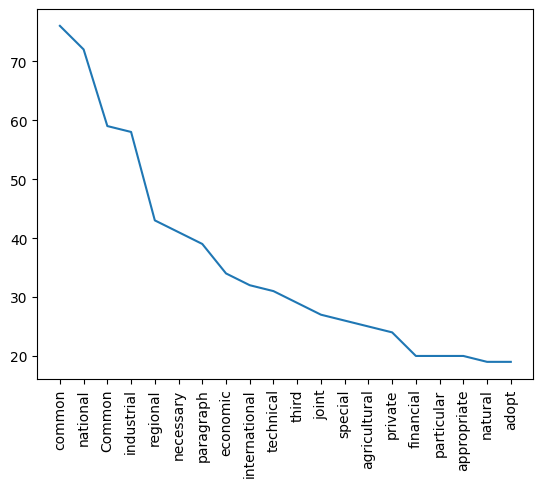

In [ ]:
#plot a finer line chart and use similar color scheme to Wordcloud

plt.plot(all_adjectives, all_adjective_frequencies)
plt.xticks(rotation=90)
plt.show()

Named Entity Recognition (NER)

In [ ]:
doc = nlp(str(corpus_data['PREAMBLE']))

entities = [(ent.text, ent.label_) for ent in doc.ents]

print('Entities:')
for entity, label in entities:
  print(f"{entity}: {label}")

Entities:
the Republic of Angola: GPE
1: CARDINAL
the Republic of Burundi: GPE
2       The President of the Federal Islamic Republic: WORK_OF_ART
3       The President of: WORK_OF_ART
the Democratic Republic of Co: GPE
4: CARDINAL
the Republic of Djibouti: GPE
3896: DATE
3897    Protocol: QUANTITY
States: GPE
3898: DATE
3899    9: DATE
3900                  : CARDINAL
Length: PERSON
3901: DATE


In [ ]:
from collections import Counter

Heatmap of Word Associations

In [ ]:
def word_associations_heatmap(tokens):
  bigrams = ngrams(tokens, 2)
  bigram_freq = Counter(bigrams)

  threshold = 5
  filtered_bigrams = {bigram: freq for bigram, freq in bigram_freq.items() if freq >= threshold}

  bigram_df = pd.DataFrame(list(filtered_bigrams.items()), columns=['bigram', 'frequency'])
  bigram_df[['word1', 'word2']] = pd.DataFrame(bigram_df['bigram'].tolist(), index=bigram_df.index)
  bigram_df = bigram_df.pivot(index='word1', columns='word2', values='frequency').fillna(0)

  bigram_df = np.log1p(bigram_df)

  plt.figure(figsize=(12, 10))
  sns.heatmap(bigram_df, cmap='coolwarm', linewidths=0.5, linecolor='gray')
  plt.title('Word Associations Heatmap')
  plt.show()

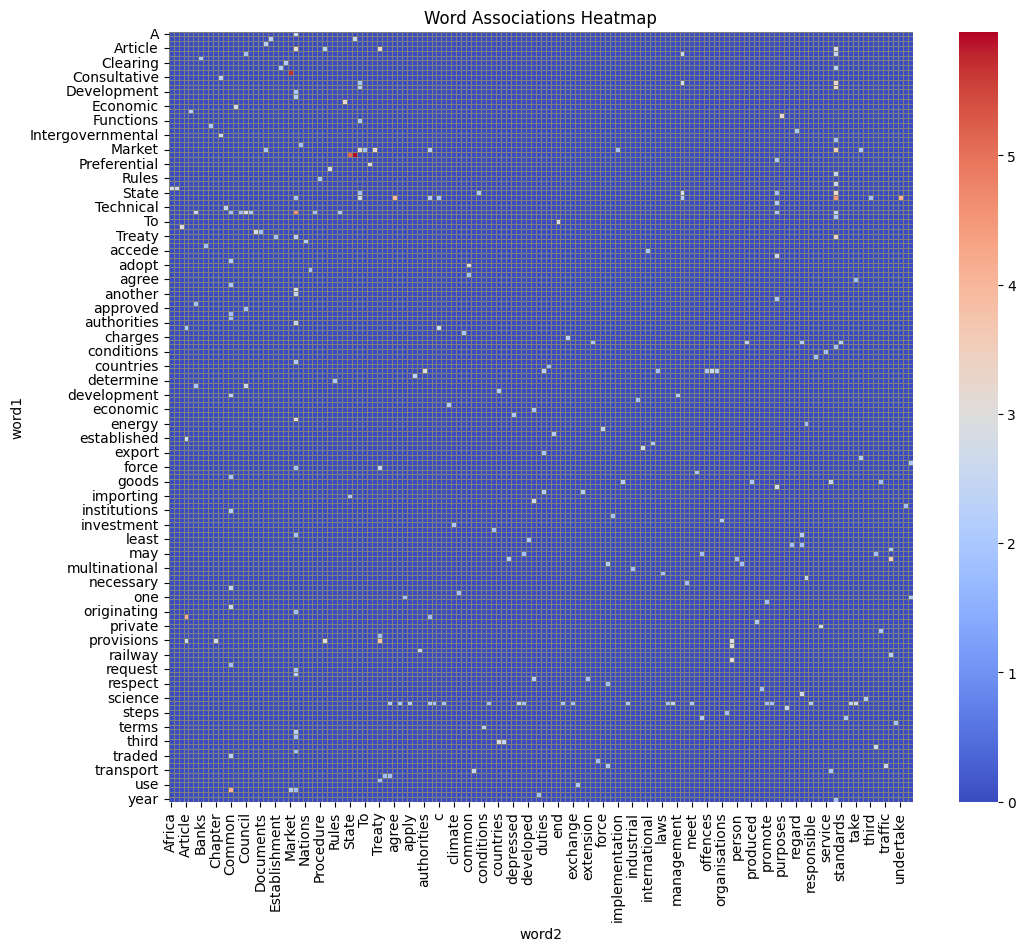

In [ ]:
word_associations_heatmap(comesa_trade_policies_preprocessed)

Topic Modelling

In [ ]:
def topic_modeling(tokens, num_topics=5):
    # Prepare data for LDA
    dictionary = corpora.Dictionary([tokens])
    doc_term_matrix = [dictionary.doc2bow([token]) for token in tokens]

    # Apply LDA
    lda_model = models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=15)

    # Print topics
    topics = lda_model.print_topics(num_words=5)
    print("LDA Topics:")
    for topic in topics:
        print(topic)

    print("\n")

    cmap = plt.get_cmap('coolwarm')
    grid_color = '#D3D3D3'

    # Plot bubble chart for topics
    plt.figure(figsize=(10, 6))
    for i, topic in topics:
        words = dict(lda_model.show_topic(i, 5))
        plt.scatter(words.values(), words.keys(), s=[v * 1000 for v in words.values()], c=[v * 1000 for v in words.values()], cmap=cmap, alpha=0.7, zorder=2)
    # plt.title('Topic Modeling - COMESA Trade Policy Document')
    # plt.grid(True, which='both', axis='both', color=grid_color, linestyle='--', linewidth=0.5)

    plt.grid(color="lightgray", alpha=0.25, zorder=1)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['left'].set_visible(False)
    # plt.gca().spines['bottom'].set_visible(False)

    # Customize the background
    plt.gca().set_facecolor('#F7F7F7')
    plt.xlabel('Topic Weight')
    plt.show()

In [ ]:
topic_modeling(comesa_trade_policies_preprocessed)

In [ ]:
topics_df = {
    'Common Market': ['States', 'Market', 'Common', 'State', 'may'],
    'Customs': ['customs', 'Council', 'offices', 'referred', 'undertake'],
    'Goods': ['shall', 'The', 'goods', 'provisions', 'the'],
    'Members & Protocol': ['Member', 'Protocol', 'necessary', 'accordance', 'management'],
    'Transit & Treaty': ['Article', 'transport', 'transit', 'Treaty', 'Transit']
}

topics = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5']
topics_frame = pd.DataFrame(topics_df, index=topics)

In [ ]:
topics_frame

,Common Market,Customs,Goods,Members & Protocol,Transit & Treaty
Topic 1,States,customs,shall,Member,Article
Topic 2,Market,Council,The,Protocol,transport
Topic 3,Common,offices,goods,necessary,transit
Topic 4,State,referred,provisions,accordance,Treaty
Topic 5,may,undertake,the,management,Transit


Most Important Keywords

In [ ]:
def tfidf_keywords(text, num_keywords=20):
    # Use TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text])

    # Get feature names and scores
    feature_names = vectorizer.get_feature_names_out()
    scores = X.toarray()[0]
    keyword_scores = list(zip(feature_names, scores))
    keyword_scores = sorted(keyword_scores, key=lambda x: x[1], reverse=True)

    # Plot bar chart
    keywords, values = zip(*keyword_scores[:num_keywords])
    plt.figure(figsize=(10, 6))
    sns.barplot(x=values, y=keywords, color="#a4b2e2", zorder=2)
    plt.grid(color="lightgray", alpha=0.25, zorder=1)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    # plt.title('Top Keywords (TF-IDF)')
    plt.xlabel('TF-IDF Score')
    plt.show()

In [ ]:
type(comesa_trade_policies_preprocessed)

list

In [ ]:
comesa_trade_policies_preprocessed_str = ' '.join(comesa_trade_policies_preprocessed)

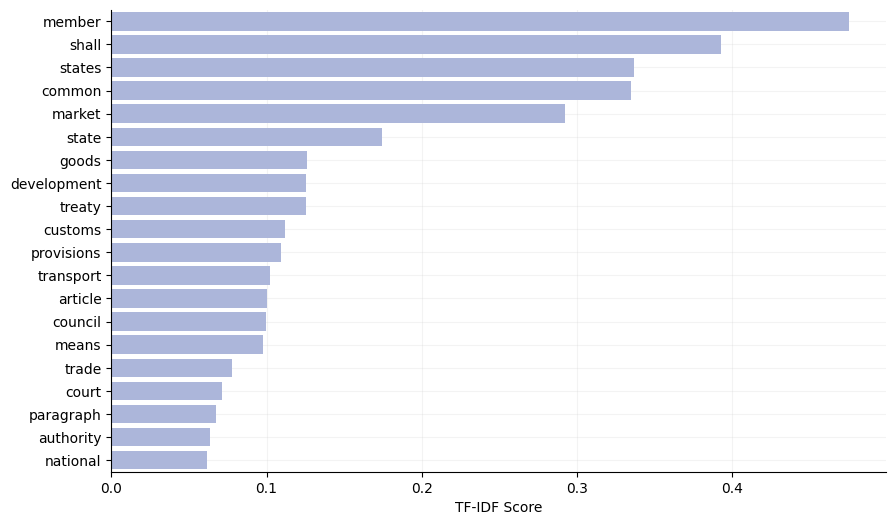

In [ ]:
tfidf_keywords(comesa_trade_policies_preprocessed_str)

Sentiment Analysis

In [ ]:
def sentiment_over_time(text):
    sia = SentimentIntensityAnalyzer()
    sentences = nltk.sent_tokenize(text)
    sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

    # Plot sentiment scores over time
    plt.figure(figsize=(10, 6))
    plt.plot(sentiment_scores, marker='o', color='#a4b2e2')
    # plt.title('Sentiment Over Time')
    plt.xlabel('Sentence Index')
    plt.ylabel('Sentiment Score')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.axhline(0, color='coral', linestyle='--')
    plt.show()

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# comesa_trade_policies_preprocessed

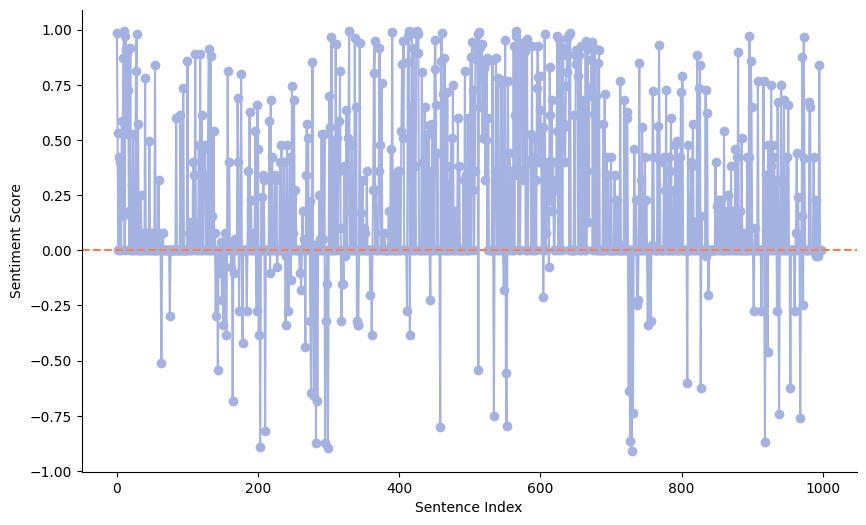

In [ ]:
sentiment_over_time(' '.join(comesa_trade_policies))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample sentiment scores (compound scores)
sentiment_scores = [0.6, -0.2, 0.4, -0.5, 0.1, 0.7, -0.3]




In [ ]:
def sentiment_over_time_heatmap(text):
    sia = SentimentIntensityAnalyzer()
    sentences = nltk.sent_tokenize(text)
    sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

    # Plot the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(sentiment_scores)), sentiment_scores, color=['#a4b2e2' if score > 0 else 'grey' if score == 0 else 'coral' for score in sentiment_scores], s=25)

    # Add labels and title
    # plt.title('Sentiment Scores Over Time (Scatter Plot)')
    plt.xlabel('Time (Sentences)')
    plt.ylabel('Sentiment Score (Compound)')
    # plt.grid(color="lightgray", alpha=0.25, zorder=1)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    # Add a horizontal line for neutral sentiment
    plt.axhline(y=0, color='black', linestyle='--')

    # Show the plot
    plt.show()

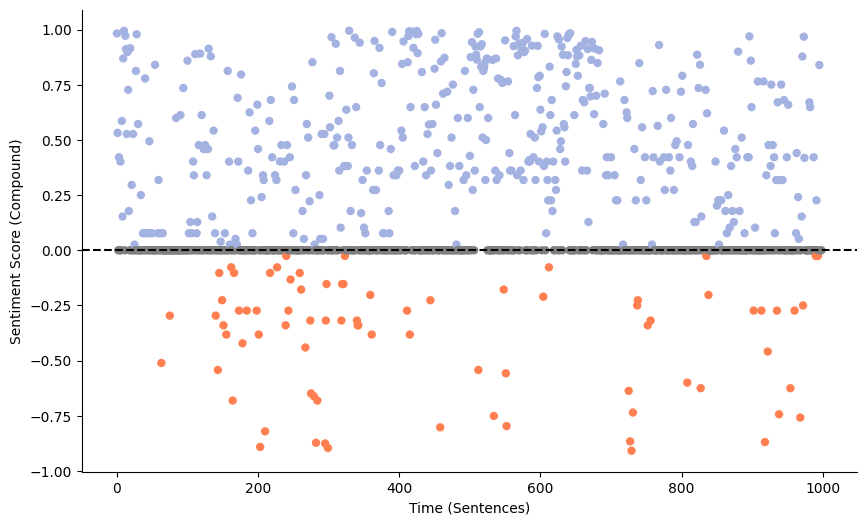

In [ ]:
sentiment_over_time_heatmap(' '.join(comesa_trade_policies))